# Customer segmentation project

# This project will be divided into 10 steps:
Python Libraries For The Project

Data Source

Loading and preprocessing of data

Exploratory Data Analysis

Feature Selection

Feature Transformation

KMeans Clustering

Impact Of Clustering Analysis On The Business Decision Making

# 1) Python Libraries For The Project

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics

# 2)Data Source 
The dataset is from kaggle.com(a platform for datascience competitions and opensource data).

# 3)Loading and preprocessing of data
I load the data into my dataframe called df.

In [7]:
df = pd.read_csv("C:/Users/SreeRam/Desktop/Datanalyst Projects/customer segmentation/Mall_Customers.csv")

Then check the first five rows.

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Replace the following column names:

Spending Score (1-100) = Spending_Score

Annual Income (k$) = Annual_Income

In [9]:
df.rename(columns = {'Genre': 'Gender','Spending Score (1-100)':'Spending_Score','Annual Income (k$)':'Annual_Income'},inplace=True)

In [10]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


check for null values

In [11]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

# 4)Exploratory Data Analysis

Here I will explore the data by asking the following questions:

a)How many customers the Mall has based on the dataset?

b)Do we have more female customers?

c)How does Gender Influence Spending?

d)What is the Age Distribution of customers?

e)How does Age relates to the spending of customers?

f)What is the Distribution Of Anual Income? And How does it relates with Spending Score?

g)What is the Distribution of Spending Score?

Note: Our target feature is the Spending Score, which indicate how much a customer spends. We will compare other features with it so as to understand each customer's spending behaviour.

a) How many customers the Mall has based on the dataset?

In [12]:
print('There are {} customers.'.format(len(df)))

There are 200 customers.


b) Do we have more female customers?

In [13]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

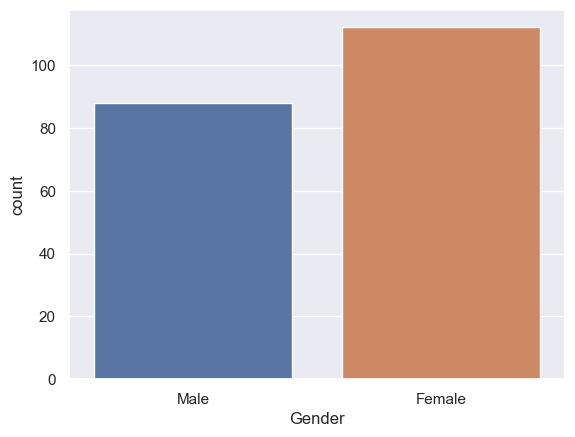

In [14]:
sns.set() 
sns.countplot(x=df.Gender,data=df)
plt.show()

both the bar chart and counts show that there are more females than male customers.

c) How does Gender Influence Spending?

In [15]:
pd.pivot_table(df,index=["Gender"],values=["Spending_Score"])

,Spending_Score
Gender,
Female,51.526786
Male,48.511364


Females spend slightly more than males.

d) What is the Age Distribution of customers?

In [16]:
print('mean is {0} and median is {1}'.format(df.Age.mean(),df.Age.median()))

mean is 38.85 and median is 36.0


<AxesSubplot:xlabel='Age', ylabel='Count'>

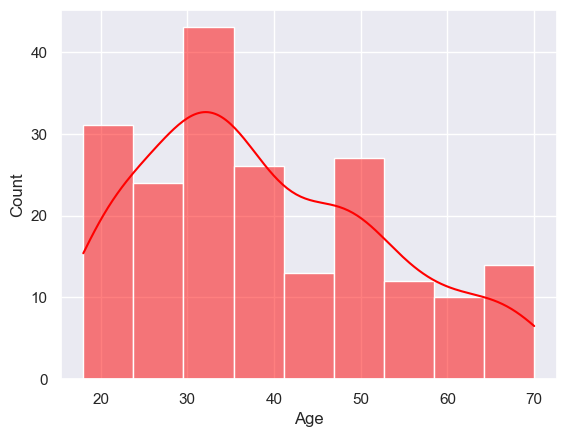

In [17]:
sns.histplot(df.Age,kde=True,color='red')

Most of the customers are within 25 to 40yrs old with an average age of 38.85 and median age of 36yrs.

e) How does Age relates to the spending of customers?

<AxesSubplot:xlabel='Age', ylabel='Spending_Score'>

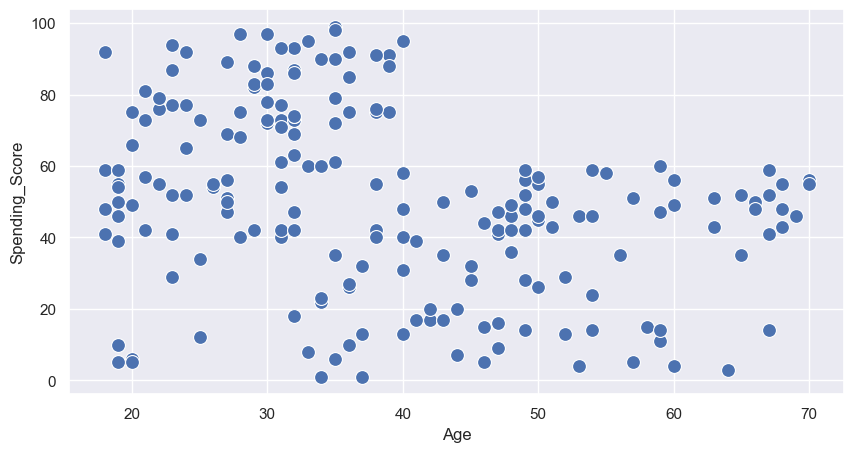

In [18]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.Age,y=df.Spending_Score,s=100)

From the scatterplot it shows that younger people tend to spend more.

f) What is the Distribution Of Anual Income? And How does it relates with Spending Score?

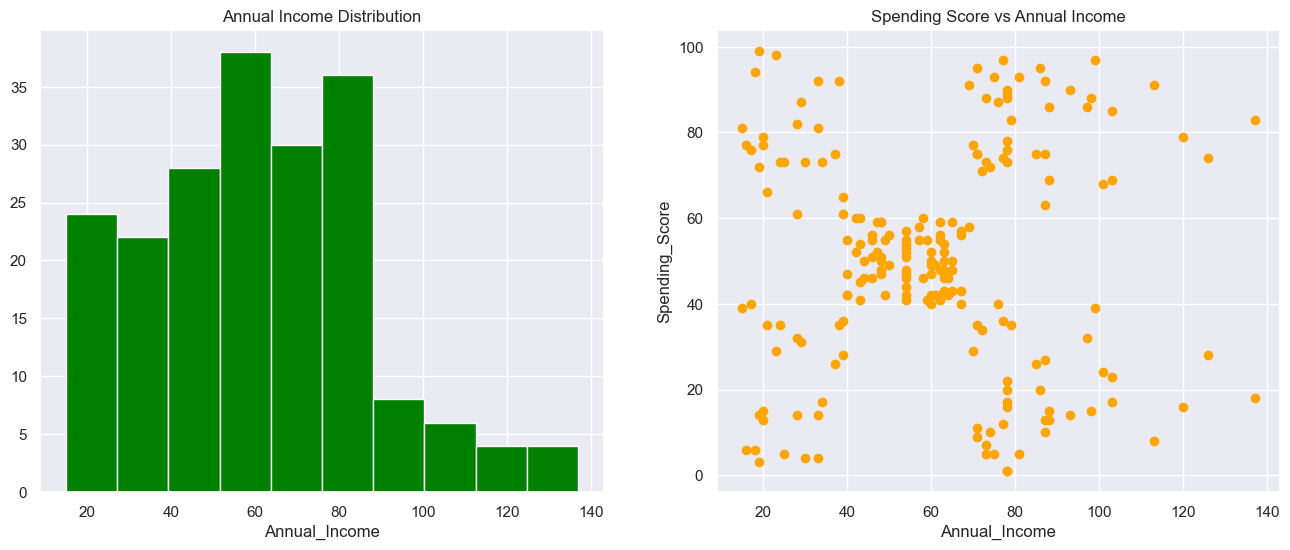

In [19]:
fig,ax = plt.subplots(1,2,figsize=(16,6))
ax[0].hist(df.Annual_Income,color='green')
ax[0].set(title='Annual Income Distribution',xlabel='Annual_Income')

ax[1].scatter(df.Annual_Income,df.Spending_Score,color='orange')
ax[1].set(xlabel='Annual_Income',ylabel='Spending_Score',title='Spending Score vs Annual Income')
plt.show()

g) What is the Distribution of Spending Score?

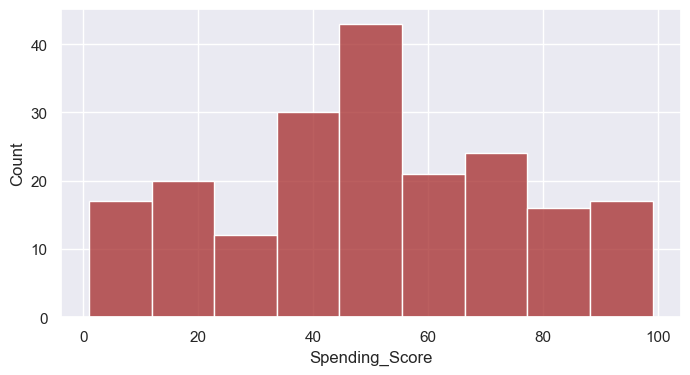

In [20]:
plt.figure(figsize=(8,4))
sns.histplot(df.Spending_Score,color='brown')
plt.show()

Spending Score is normally distributed

# 5) Feature Selection

From the exploratory data analysis above, it is found that all the variables have some sort of relationship with spending score. We will be using all the variables to build the clustering models.

# 6) Feature Transformation

Since the Gender column datatype is categorical, then we have to convert it into a numerical datatype using one hot encoding(pandas.get_dummies).

In [25]:
df = pd.get_dummies(df,drop_first=True)

In [26]:
df.head()

,CustomerID,Age,Annual_Income,Spending_Score,Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


# 7) KMeans Clustering

Initialize cluster

In [27]:
k_cluster = KMeans(n_clusters=5, random_state=0)

Lets use the elbow method to find the best number of clusters

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


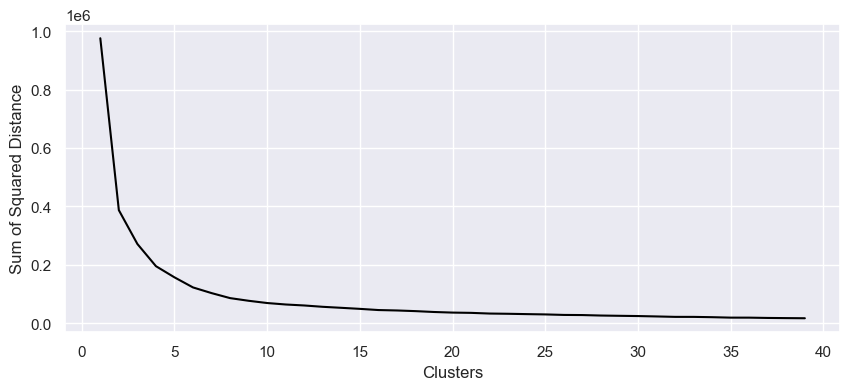

In [28]:
ssq_distance = []
for k in range(1 ,40):
    cluster = KMeans(n_clusters=k, random_state=0)
    cluster.fit(df)
    ssq_distance.append(cluster.inertia_)
    
plt.figure(1 , figsize = (10 ,4))
plt.plot(list(range(1,40)), ssq_distance,color='black')
plt.xlabel('Clusters') , plt.ylabel('Sum of Squared Distance')
plt.show()


Fit the data and get the labels

In [29]:
k_cluster.fit(df)
k_labels = k_cluster.labels_

How does the clusters relate with our variables?

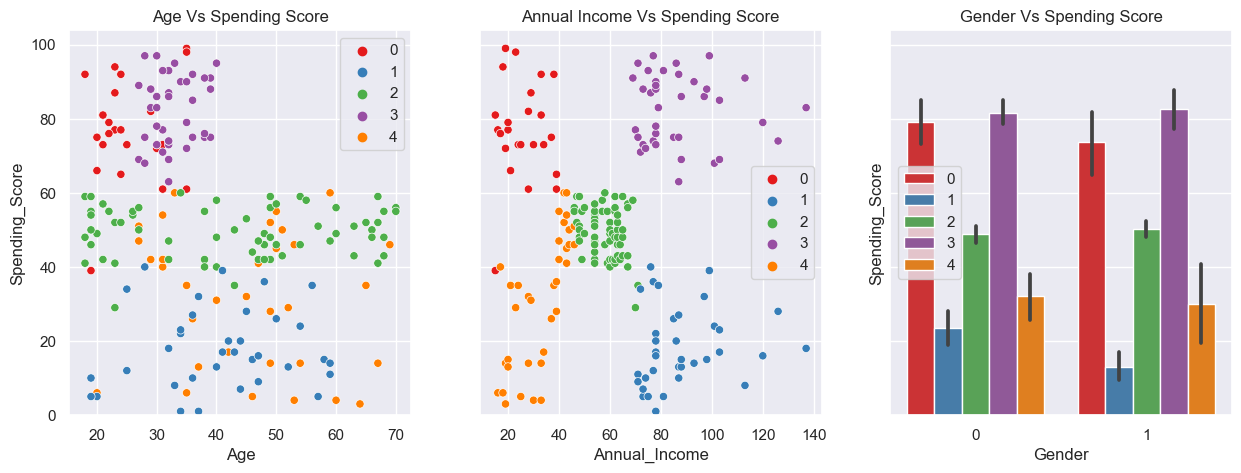

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.scatterplot(ax=axes[0],x=df.Age, y=df.Spending_Score,hue=k_labels,palette='Set1')
axes[0].set_title('Age Vs Spending Score')

sns.scatterplot(ax=axes[1], x=df.Annual_Income, y=df.Spending_Score,hue=k_labels,palette='Set1')
axes[1].set_title('Annual Income Vs Spending Score')

sns.barplot(ax=axes[2], x=df.Gender_Male, y=df.Spending_Score,hue=k_labels,palette='Set1')
axes[2].set_title('Gender Vs Spending Score')
axes[2].set_xlabel('Gender')
plt.show()

From the plots above, it is obvious that Age is the most important factor in determininig Spending Score. Irrespective of their Annual income, younger people tend to spend more.

# 8) Impact Of Clustering Analysis On The Business Decision Making

From the analysis we saw that younger people aged between 20 to 40 patronize the product(s)/service(s) more than older people.The business should target Ads on this population, as they will get highier turnover and conversion rate.

It is also seen that female customers are slightly more than male customers, and they spend more even if their annual income is less than 50.This may represent a very desperate group, that needs the product(s) more. This is an area the business should obtain more data on for further analysis.